# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

Rates are given per 1,00,000 residents

In [1]:
#importing necessary libraries
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN
from sklearn.metrics import silhouette_score as sil 
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
crime = pd.read_csv('crime_data.csv')
crime.head() 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime.rename(columns = {'Unnamed: 0':'States'},  inplace = True)
crime.head() 

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Descriptive Statistics

In [4]:
crime.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.isna().sum().sum()

0

In [7]:
crime.duplicated().sum()

0

There are no missing and duplicate values

## Data Visualisation 

### Plotting histogram to see distribution  & Plotting boxplot for Outlier Detection

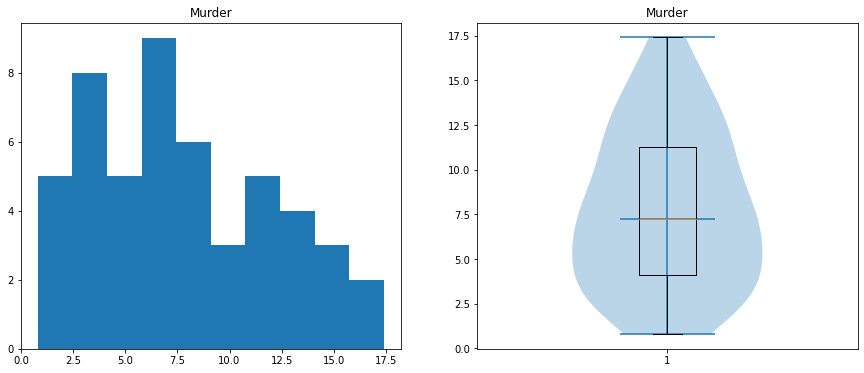

In [8]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Murder)
plt.title('Murder')

plt.subplot(1,2,2)
plt.violinplot(crime.Murder,showmedians=True)
plt.boxplot(crime.Murder)
plt.title('Murder')
plt.show()

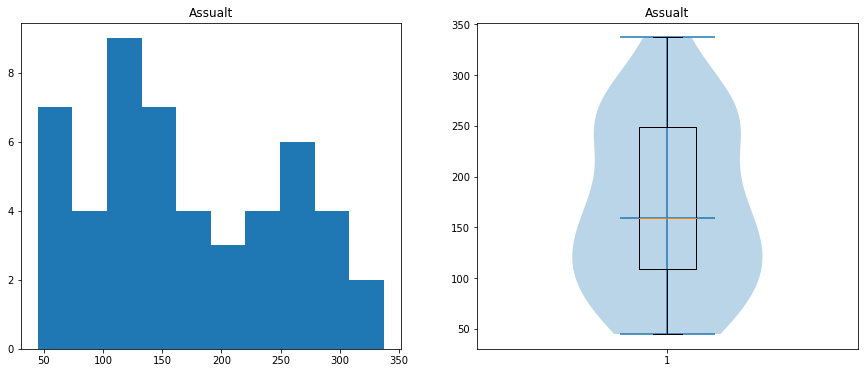

In [9]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Assault)
plt.title('Assualt')

plt.subplot(1,2,2)
plt.violinplot(crime.Assault,showmedians=True)
plt.boxplot(crime.Assault)
plt.title('Assualt')
plt.show()

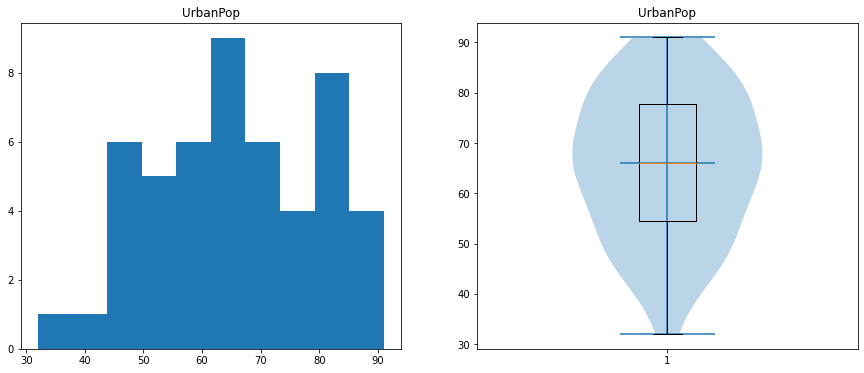

In [10]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.UrbanPop)
plt.title('UrbanPop')

plt.subplot(1,2,2)
plt.violinplot(crime.UrbanPop,showmedians=True)
plt.boxplot(crime.UrbanPop)
plt.title('UrbanPop')
plt.show()

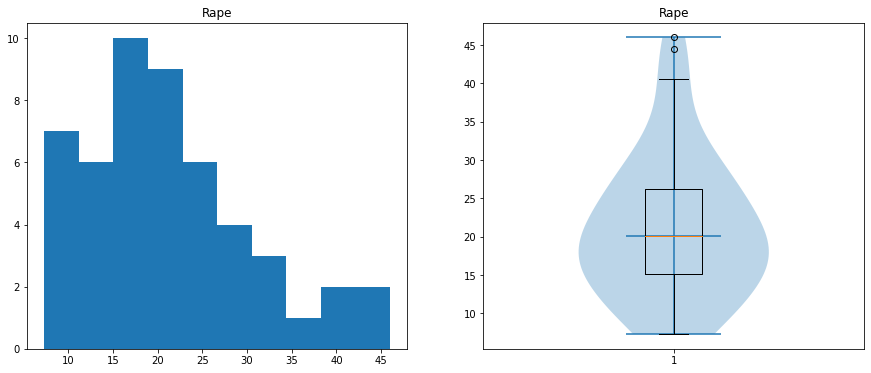

In [11]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(crime.Rape)
plt.title('Rape')

plt.subplot(1,2,2)
plt.violinplot(crime.Rape,showmedians=True)
plt.boxplot(crime.Rape)
plt.title('Rape')
plt.show()

2 outliers in Rape column 

### Correlation

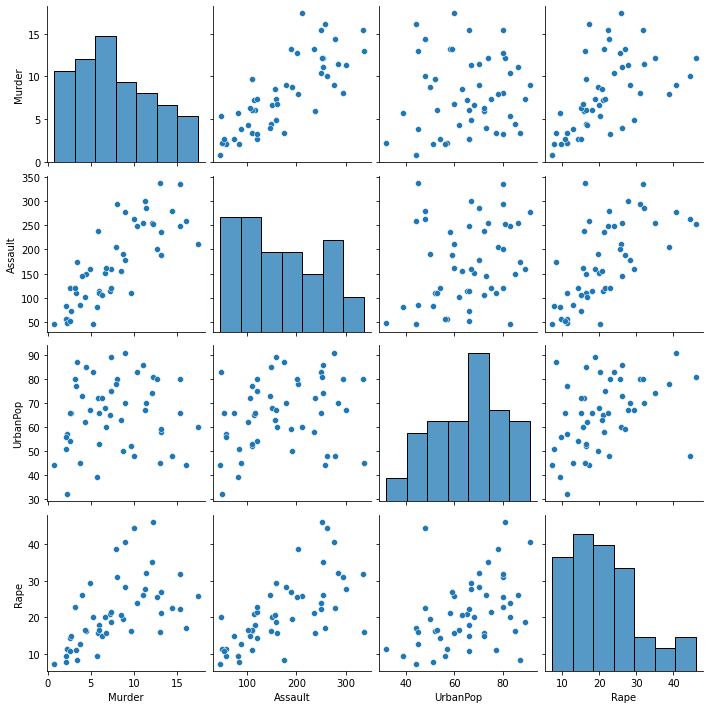

In [12]:
sns.pairplot(crime)

### Assault, murder and rape all are positively correlated with each other.

### Murder rate

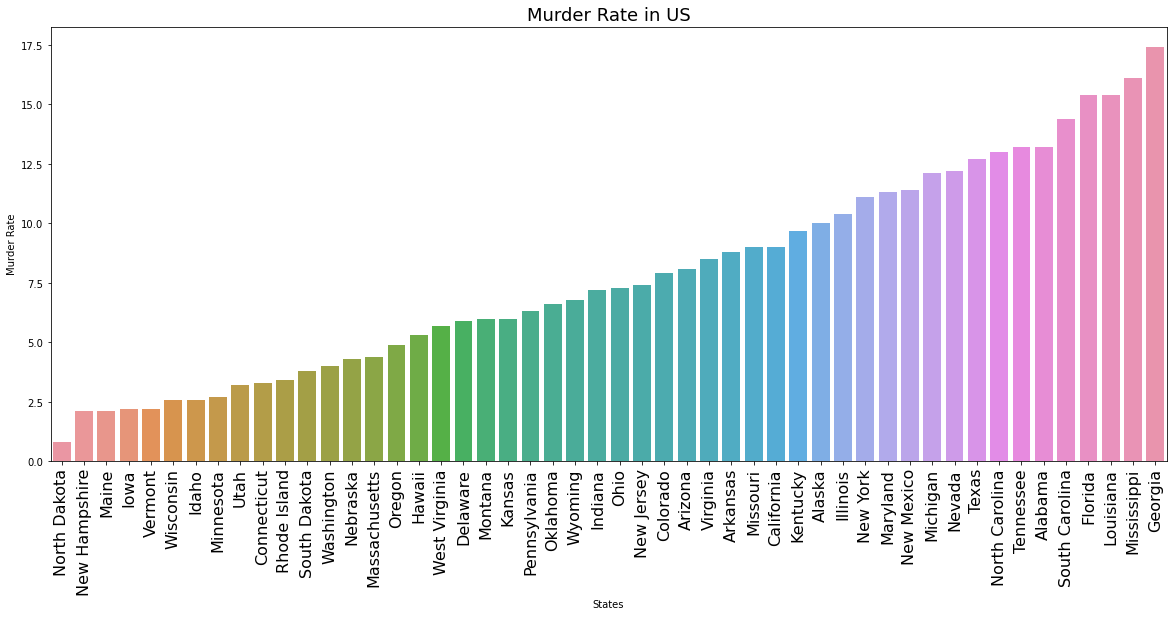

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(x=crime.States , y= crime.Murder, order= crime.sort_values('Murder').States)

plt.xlabel("States")
plt.ylabel("Murder Rate")
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US", size=18)
plt.show()

### Assault Rate

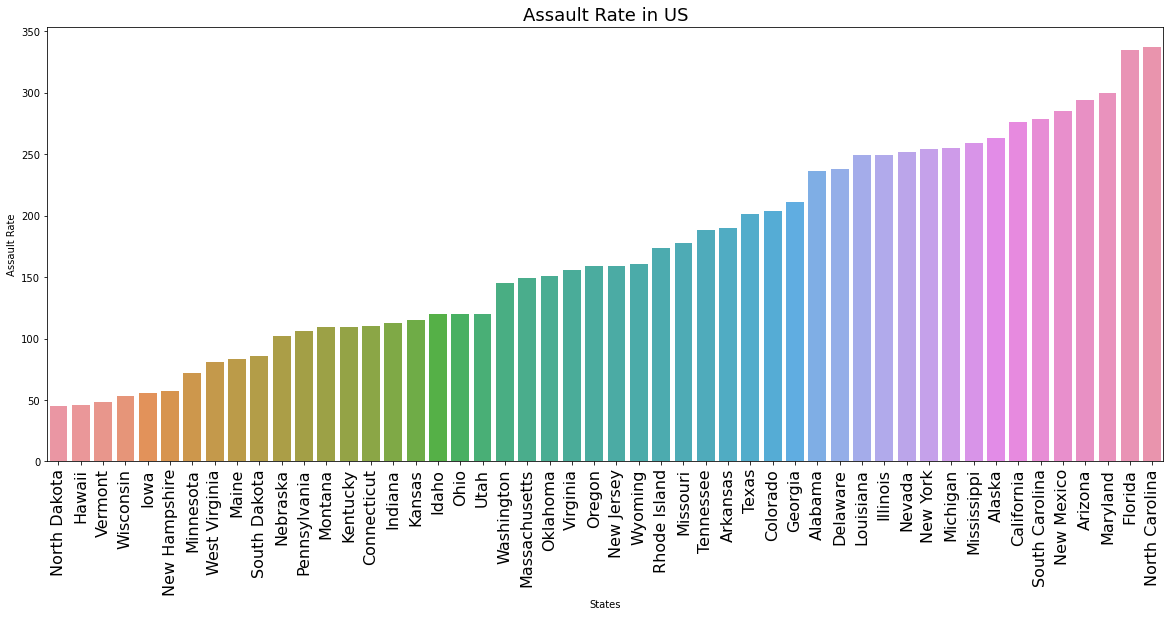

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(x=crime.States , y= crime.Assault, order= crime.sort_values('Assault').States)

plt.xlabel("States")
plt.ylabel("Assault Rate")
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US", size=18)
plt.show()

### Rape Rate

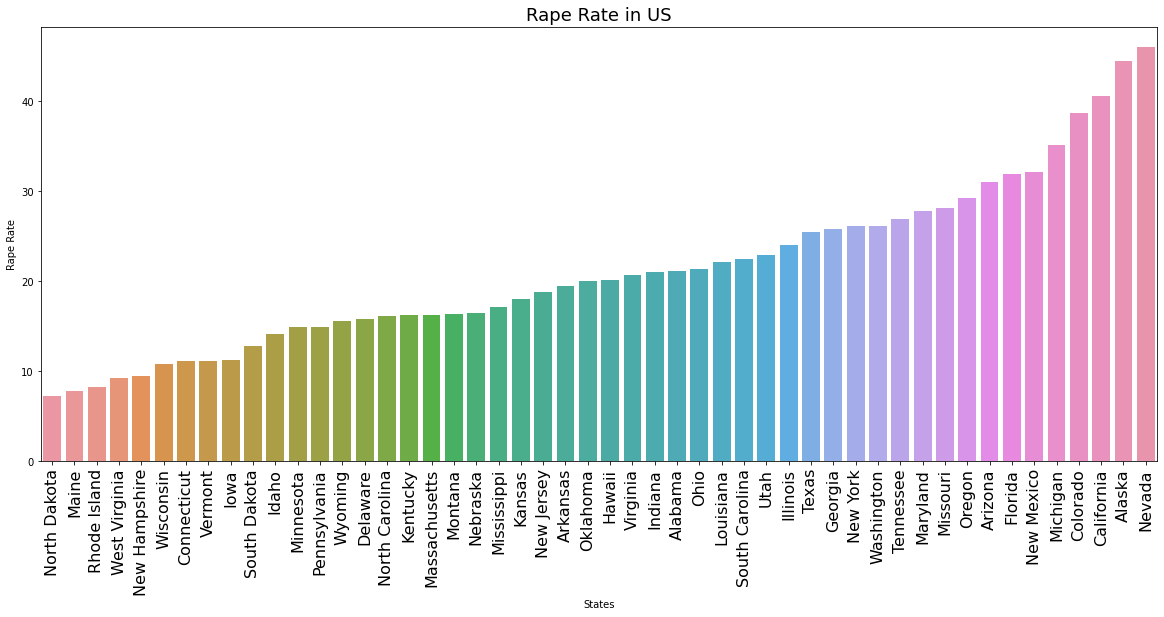

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x=crime.States , y= crime.Rape, order= crime.sort_values('Rape').States)

plt.xlabel("States")
plt.ylabel("Rape Rate")
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US", size=18)
plt.show()

### Urban Population Rate 

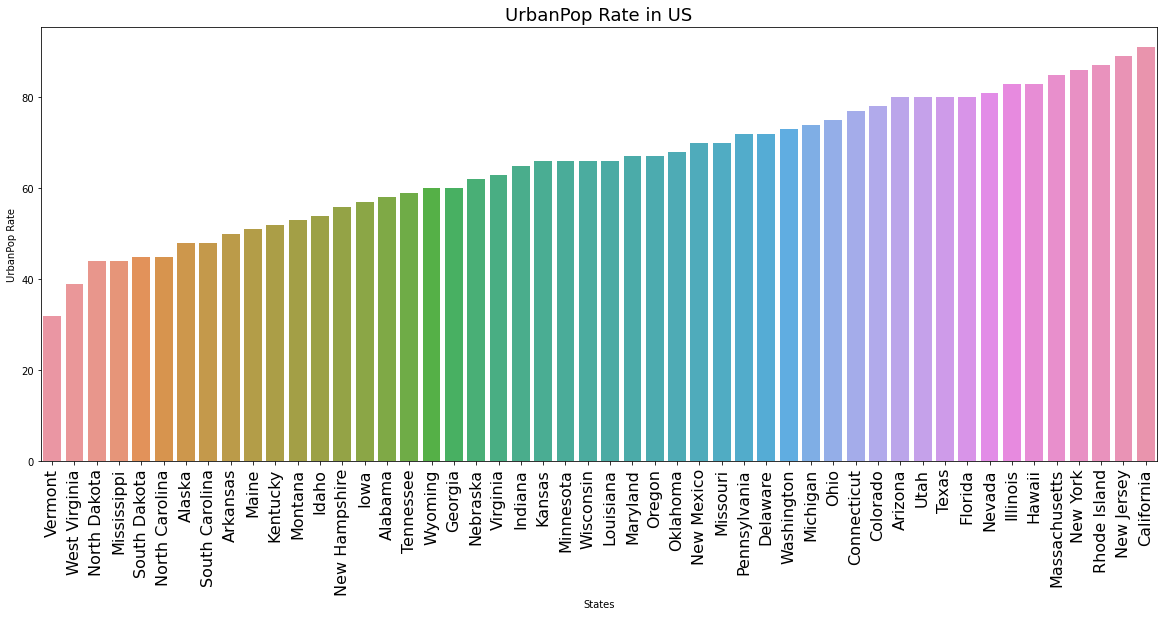

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=crime.States , y= crime.UrbanPop, order= crime.sort_values('UrbanPop').States)

plt.xlabel("States")
plt.ylabel("UrbanPop Rate")
plt.xticks(rotation = 90, fontsize = 16)
plt.title("UrbanPop Rate in US", size=18)
plt.show()

## Data Preprocessing

#### Normalisation of data (use it for hierarchical clustering)

In [17]:
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return(x)

In [18]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


#### Standardisation of data (use it for K means and DB SCAN)

In [19]:
scaler = StandardScaler()
crime_std = scaler.fit_transform(crime.iloc[:,1:]) 
crime_std 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Clustering: 

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

## 1) Hierarchical Clustering

Hierarchy of clusters is in the form of a tree, and this tree-shaped structure is known as the dendrogram. There is no requirement to predetermine the number of clusters as in the K-Means algorithm. 

Linkage methods are ways to calculate the distance between two clusters.

Single Linkage: It is the Shortest Distance between the closest points of the clusters

Complete Linkage: It is the farthest distance between the two points of two different clusters

Average Linkage: It is the linkage method in which the distance between each pair of datasets is added up and then divided by the total number of datasets to calculate the average distance between two clusters.

Centroid Linkage: It is the linkage method in which the distance between the centroid of the clusters is calculated.

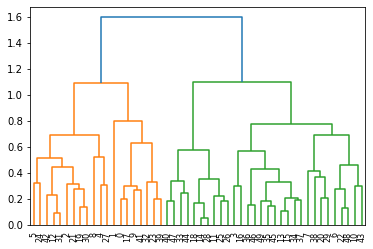

In [20]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'complete'))

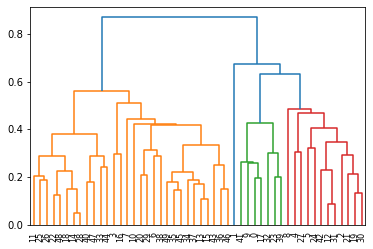

In [21]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'average'))

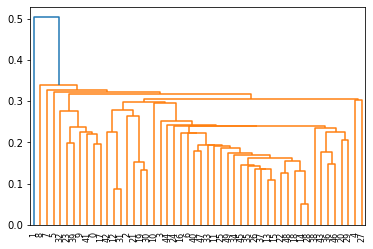

In [22]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'single'))

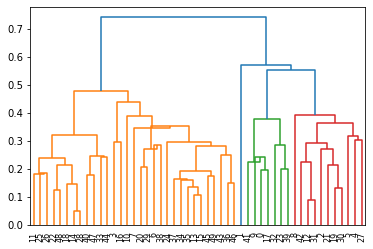

In [23]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method= 'centroid'))

2 choices to make: Linkage and n_clusters

Linkage: From above different dendrograms, whichever looks simpler, we take that in model

#### Here complete linkage looks simpler

n_clusters: n for which silhouette score is maximum

Silhouette score is a metric used to calculate the goodness of a clustering technique. ie. It measures of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

a= average intra-cluster distance 

b= average inter-cluster distance

In [24]:
for i in range (2,8):
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage= 'complete')
    y_hc = hc.fit_predict(crime_norm)
    sil_score =sil(crime_norm , y_hc)
    print('For cluster =', i , 'The silhouette score is', sil_score)  

For cluster = 2 The silhouette score is 0.42364457559625074
For cluster = 3 The silhouette score is 0.30877213909512063
For cluster = 4 The silhouette score is 0.30607294424263076
For cluster = 5 The silhouette score is 0.3056360903608855
For cluster = 6 The silhouette score is 0.27284356597794224
For cluster = 7 The silhouette score is 0.2738764216820654


#### Silhouette score is maximum for n_clusters = 2 

In [25]:
# create clusters with complete linkage and n_clusters = 2
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage= 'complete')

In [26]:
y_hc = hc.fit_predict(crime_norm)
y_hc 

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
crime['ClusterId_hc'] = y_hc
crime 

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [28]:
crime["ClusterId_hc"].value_counts()

0    30
1    20
Name: ClusterId_hc, dtype: int64

In [29]:
crime.groupby('ClusterId_hc').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterId_hc,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


Insight:

Optimum no. of clusters is 2

As we can see from above table, states with clusterid 0 are relatively safer as compared to states with clusterid 1

In [30]:
name = input('What is name of your state? \n') 

What is name of your state? 
South Dakota


In [31]:
for i in range (0, len(crime)): 
    if name == crime.States[i]:
        print('Your state is category', crime.ClusterId_hc[i], 'state') 
        if crime.ClusterId_hc[i] == 0:
            print('Your state is safe state')
        else:
            print('Your state is in danger zone')

Your state is category 0 state
Your state is safe state


## 2) K-Means

K-means clustering is an unsupervised algorithm. In an unsupervised algorithm, we are not interested in making predictions (since we don’t have a target/output variable). The objective is to discover interesting patterns in the data, e.g., are there any subgroups or ‘clusters’ in dataset 

K-means is a centroid-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

Centroids of newly formed clusters do not change

Points remain in the same cluster

Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve.

How to find optimum number of  cluster? 

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion

In [32]:
wcss = []

for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(crime_std)
    wcss.append(kmeans.inertia_)
    
wcss 

[200.0,
 104.96163315756873,
 80.08886132199619,
 57.55425863091106,
 50.520265525350695,
 43.92746404497574,
 40.52183461131975,
 34.687388397849084,
 32.70648136388185,
 28.311639397122555]

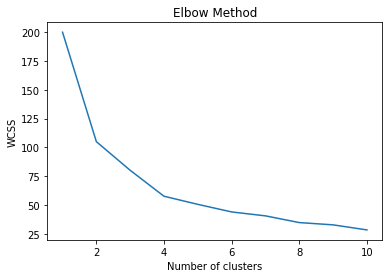

In [33]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The value of inertia [i.e sum of squared distance of samples to their closest cluster center] decreases as the number of clusters increase- so we will need to manually pick K while considering the trade-off between the inertia value and the number of clusters.

Here, We take no of clusters = 2.

But elbow is not clearly visible, so lets take help of silhouette score to find out optimum no. of clusters.

In [34]:
for i in range (2,8):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(crime_std) 
        sil_score =sil(crime_std , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score)  

For cluster = 2 The silhouette score is 0.4084890326217641
For cluster = 3 The silhouette score is 0.30813622648945616
For cluster = 4 The silhouette score is 0.33968891433344395
For cluster = 5 The silhouette score is 0.2968626678243933
For cluster = 6 The silhouette score is 0.2797372888992387
For cluster = 7 The silhouette score is 0.24929596022381695


### Silhouette score is maximum for n_clusters = 2

In [35]:
clusters = KMeans(n_clusters=2, random_state= 1)
clusters.fit(crime_std)

KMeans(n_clusters=2, random_state=1)

In [36]:
clusters.labels_ 

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [37]:
crime['ClusterId_kmeans'] = clusters.labels_ 
crime 

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,0
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,1


In [38]:
crime.groupby('ClusterId_kmeans').agg(['mean']) 

,Murder,Assault,UrbanPop,Rape,ClusterId_hc
,mean,mean,mean,mean,mean
ClusterId_kmeans,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


Insight: 

Optimum no. of clusters is 2

As we can see from above table, states with clusterid 0 are relatively safer as compared to states with clusterid 1

In [39]:
name = input('What is name of your state? \n') 

What is name of your state? 
Texas


In [40]:
for i in range (0, len(crime)): 
    if name == crime.States[i]:
        print('Your state is category', crime.ClusterId_kmeans[i], 'state') 
        if crime.ClusterId_kmeans[i] == 0:
            print('Your state is safe state')
        else:
            print('Your state is in danger zone') 

Your state is category 1 state
Your state is in danger zone


## 3)DB SCAN

K-means, hierarchical clustering work for finding spherical-shaped clusters or convex clusters. They are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

In real life, Clusters can be of arbitrary shape and may contain noise.

Hence, to overcome these shortcomings we use DB SCAN 

#### The DBSCAN algorithm uses two parameters:

minPts: The minimum number of points clustered together for a region to be considered dense.

eps (ε): A distance that will be used to locate the points in the neighborhood of any point.

#### There are three types of points after the DBSCAN clustering is complete:

Core — This is a point that has at least m points within distance n from itself.

Border — This is a point that has at least one Core point at a distance n.

Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

#### Silhouette score

In [41]:
eps = [0.25,0.5,0.75,1.00,1.25,1.5,1.75,2.00]
min_samples = [1,2]

for i in range (len(eps)):
    for j in range (len(min_samples)):
        dbscan = DBSCAN(eps=eps[i] , min_samples=min_samples[j])
        dbscan.fit(crime_std)
        sil_score=sil(crime_std, dbscan.labels_)
        print('for eps=', eps[i], 'and min_samples=', min_samples[j] , 'sil_score is', sil_score)

for eps= 0.25 and min_samples= 1 sil_score is 0.02524285085226844
for eps= 0.25 and min_samples= 2 sil_score is 0.038817626029398714
for eps= 0.5 and min_samples= 1 sil_score is 0.06502546728043575
for eps= 0.5 and min_samples= 2 sil_score is -0.2689925316677858
for eps= 0.75 and min_samples= 1 sil_score is -0.015304812731762202
for eps= 0.75 and min_samples= 2 sil_score is -0.09728961540145159
for eps= 1.0 and min_samples= 1 sil_score is 0.0011630308334708251
for eps= 1.0 and min_samples= 2 sil_score is 0.19290975823254836
for eps= 1.25 and min_samples= 1 sil_score is 0.21127138005172738
for eps= 1.25 and min_samples= 2 sil_score is 0.2257103196361524
for eps= 1.5 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 1.5 and min_samples= 2 sil_score is 0.23455598753159795
for eps= 1.75 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 1.75 and min_samples= 2 sil_score is 0.23455598753159795
for eps= 2.0 and min_samples= 1 sil_score is 0.23455598753159795
for eps= 2.0

for eps= 1.5 and min_samples= 1 --->  sil_score is 0.2345 

In [42]:
dbscan = DBSCAN(eps= 1.5, min_samples=1)
dbscan.fit(crime_std)

DBSCAN(eps=1.5, min_samples=1)

In [43]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

-1 are the noise points in our dataset and remaining are part of cluster. 

In [44]:
crime['Noise'] = dbscan.labels_
crime.head() 

,States,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans,Noise
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,1,1
2,Arizona,8.1,294,80,31.0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,0,0
4,California,9.0,276,91,40.6,1,1,0


In [45]:
df = crime.groupby('Noise').agg('mean')
df #Ignore last 2 columns

,Murder,Assault,UrbanPop,Rape,ClusterId_hc,ClusterId_kmeans
Noise,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


<AxesSubplot:xlabel='Noise', ylabel='Rape'>

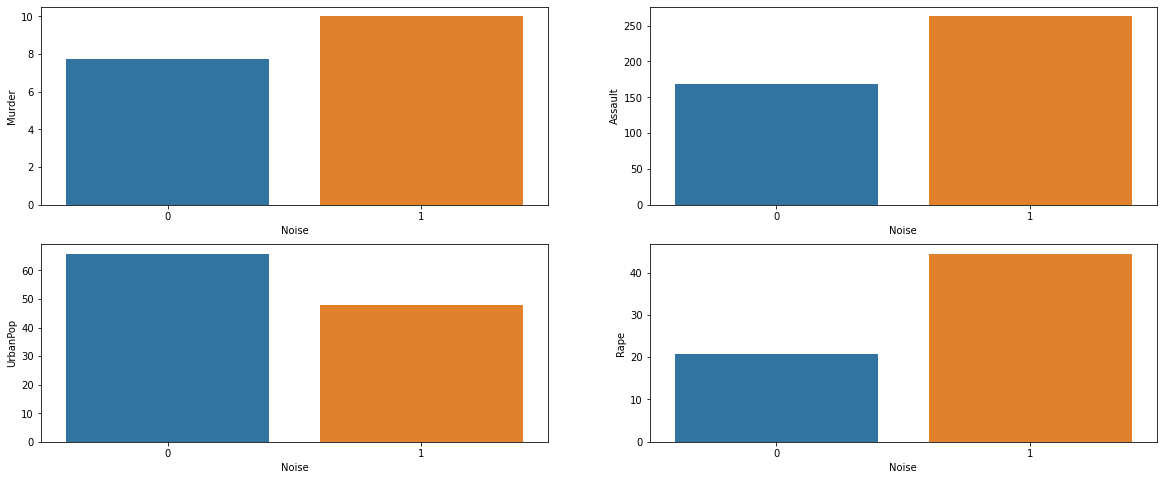

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.barplot(x=df.index , y=df.Murder)

plt.subplot(2,2,2)
sns.barplot(x=df.index , y=df.Assault)

plt.subplot(2,2,3)
sns.barplot(x=df.index , y=df.UrbanPop)

plt.subplot(2,2,4)
sns.barplot(x=df.index , y=df.Rape)

# Thank You